# 1.	Comenten el conjunto de datos y discuta las razones para utilizar el algoritmo de K-Means y cómo puede ayudar a la empresa.

In [1]:
# Se puede utilizar el algortimo K-means para realizar una segmentación de productos focalizada al comportamiento de compra de 
# grupos de clientes que tengan patrones o comportamientos de compra similiares. Para así poder realizar campañas de marketing
# más efectivas y personalizadas a los gustos y preferencias de cada cluster de clientes.

# 2.	Cargue el conjunto de datos de transacciones y realizar un análisis exploratorio de los datos para entender su estructura y las variables disponibles. Explique la estructura y utilidad del dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importar dataset OnlineRetail.csv
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3.	Limpie y transforme los datos según sea necesario. Esto puede implicar la eliminación de valores faltantes, la conversión de variables categóricas en numéricas, la creación de nuevas variables (por ejemplo, total de ventas por cliente), y la normalización o estandarización de las variables.

In [7]:
# crear mascara que filtre los InvoiceNo que empiecen con C
mascara_C = df['InvoiceNo'].str.contains('C', na=False)

# Aplicar complemento de la mascara anterior
df2 = df[~mascara_C] 
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [8]:
df2.describe()
# Hay valores negativos en Quantity y UnitPrice, por lo que se deben eliminar. Pero primero se debe verificar si hay valores nulos.

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [9]:
# revisar si hay valores nan
df2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [10]:
# Eliminar filas con valores nan
df2 = df2.dropna()
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [11]:
# castear CustomerID como entero y luego pasarlo a string
df2['CustomerID'] = df2['CustomerID'].astype('Int64').astype('str')

C:\Users\diego\AppData\Local\Temp\ipykernel_27204\376766824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CustomerID'] = df2['CustomerID'].astype('Int64').astype('str')


In [12]:
df2.isna().sum()
# Ya no hay valores nulos las columnas

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df2.describe()
# Al eliminar los valores nulos se eliminaron las filas con valores negativos en Quantity y UnitPrice

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [14]:
# Calcular media de Quantity y UnitPrice
media_quantity = df2['Quantity'].mean()
media_unitprice = df2['UnitPrice'].mean()

# Calcular desviacion estandar de Quantity y UnitPrice
std_quantity = df2['Quantity'].std()
std_unitprice = df2['UnitPrice'].std()

In [15]:
# crear mascara que filtre outliers por regla empirica del 99.7%
mascara_outliers_quantity = (df2['Quantity'] <= (media_quantity + 3*std_quantity)) & (df2['Quantity'] >= (media_quantity - 3*std_quantity))
mascara_outliers_unitprice = (df2['UnitPrice'] <= (media_unitprice + 3*std_unitprice)) & (df2['UnitPrice'] >= (media_unitprice - 3*std_unitprice))

# Aplicar mascaras de outliers
df2 = df2[mascara_outliers_quantity]
df2 = df2[mascara_outliers_unitprice]

C:\Users\diego\AppData\Local\Temp\ipykernel_27204\1152571710.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[mascara_outliers_unitprice]


In [16]:
df2.describe()
# Ya no hay valores atipicos en Quantity y UnitPrice

,Quantity,UnitPrice
count,397315.000000,397315.000000
mean,11.697399,2.884256
std,25.915873,3.232075
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,552.000000,65.000000


In [17]:
# Calcular Sales
df2['Sales'] = df['Quantity'] * df['UnitPrice']

# crear nueva columna con numero entero de fecha
df2['Date'] = pd.to_datetime(df2['InvoiceDate']).dt.date
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Fecha_num'] = (df2['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1 day')
df2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Fecha_num
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30,2010-01-12,14621
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12,14621
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00,2010-01-12,14621
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12,14621
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12,14621
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France,10.20,2011-09-12,15229
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France,12.60,2011-09-12,15229
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France,16.60,2011-09-12,15229
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France,16.60,2011-09-12,15229


In [18]:
df2.describe()

,Quantity,UnitPrice,Sales,Fecha_num
count,397315.000000,397315.000000,397315.000000,397315.000000
mean,11.697399,2.884256,20.528807,15145.779603
std,25.915873,3.232075,54.003478,130.887603
min,1.000000,0.000000,0.000000,14621.000000
25%,2.000000,1.250000,4.680000,15063.000000
50%,6.000000,1.950000,11.800000,15164.000000
75%,12.000000,3.750000,19.800000,15257.000000
max,552.000000,65.000000,4401.000000,15318.000000


# 4.	Visualice los datos y las relaciones entre las variables. Esto puede incluir histogramas, gráficos de dispersión, y gráficos de caja. Justifique sus decisiones.

Text(0.5, 1.0, 'Precio unitario por ventas')

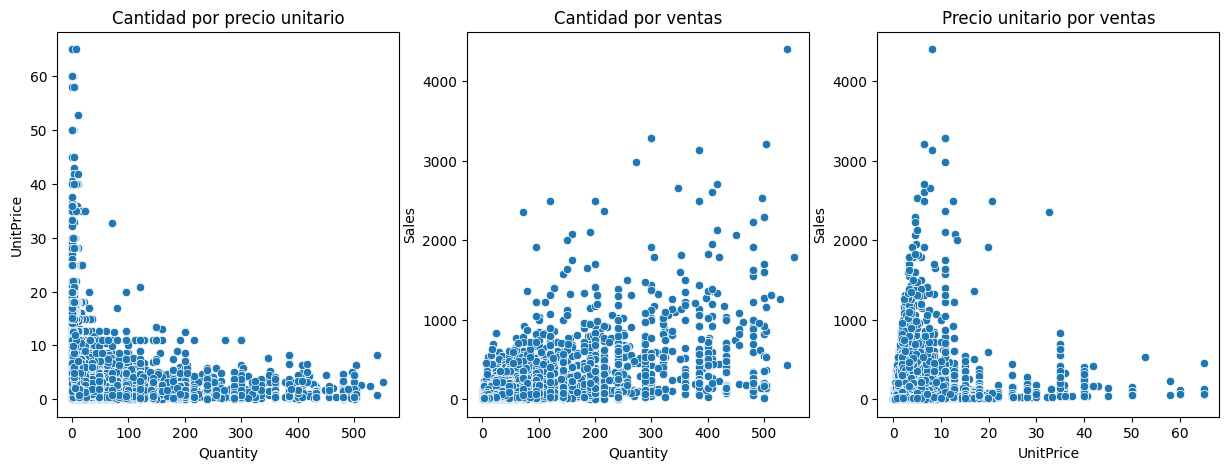

In [19]:
# Graficar cantidad por precio unitario
fig ,axs = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df2, ax=axs[0])
sns.scatterplot(x='Quantity', y='Sales', data=df2, ax=axs[1])
sns.scatterplot(x='UnitPrice', y='Sales', data=df2, ax=axs[2])

# Agregar titulos
axs[0].set_title('Cantidad por precio unitario')
axs[1].set_title('Cantidad por ventas')
axs[2].set_title('Precio unitario por ventas')


<Axes: xlabel='Country', ylabel='Sales'>

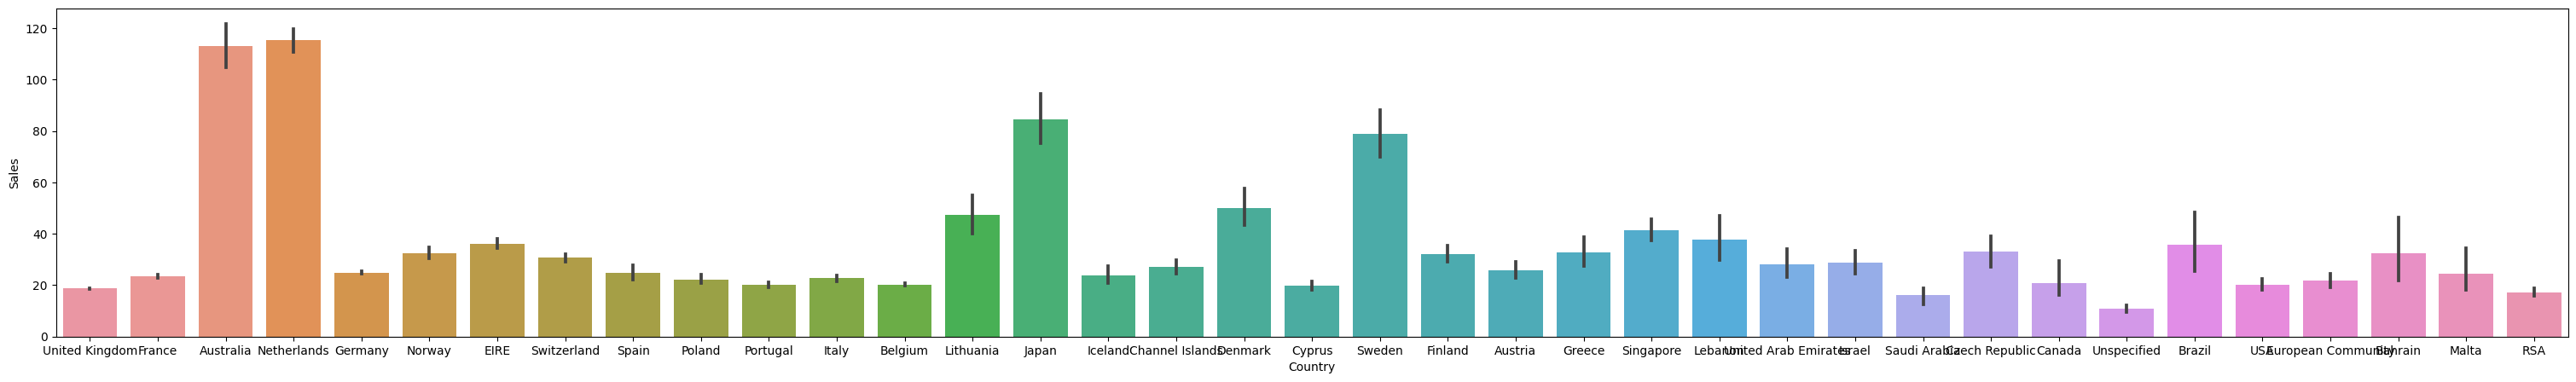

In [20]:
# Graficar ventas por pais
fig, ax = plt.subplots(figsize=(38,5))
sns.barplot(x='Country', y='Sales', data=df2, ax=ax)


# 5.	Aplique el algoritmo al conjunto de datos procesado. Experimente con diferentes números de clústeres (k) y observe cómo cambian los resultados.

In [21]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap

In [22]:
# Generate synthetic data with four clusters
n_centers = np.random.randint(2, 6)

# crear dataframe x con agg de Sales por CustomerID
X = df2.groupby(['Fecha_num']).agg({'Sales': 'sum'})
X

,Sales
Fecha_num,
14621,46067.49
14652,43761.98
14680,23691.31
14741,31656.40
14772,31215.64
...,...
15314,11638.96
15315,17948.19
15316,17580.17


In [23]:
# Restrear indice
X.reset_index(inplace=True)
X

,Fecha_num,Sales
0,14621,46067.49
1,14652,43761.98
2,14680,23691.31
3,14741,31656.40
4,14772,31215.64
...,...,...
300,15314,11638.96
301,15315,17948.19
302,15316,17580.17
303,15317,27734.40


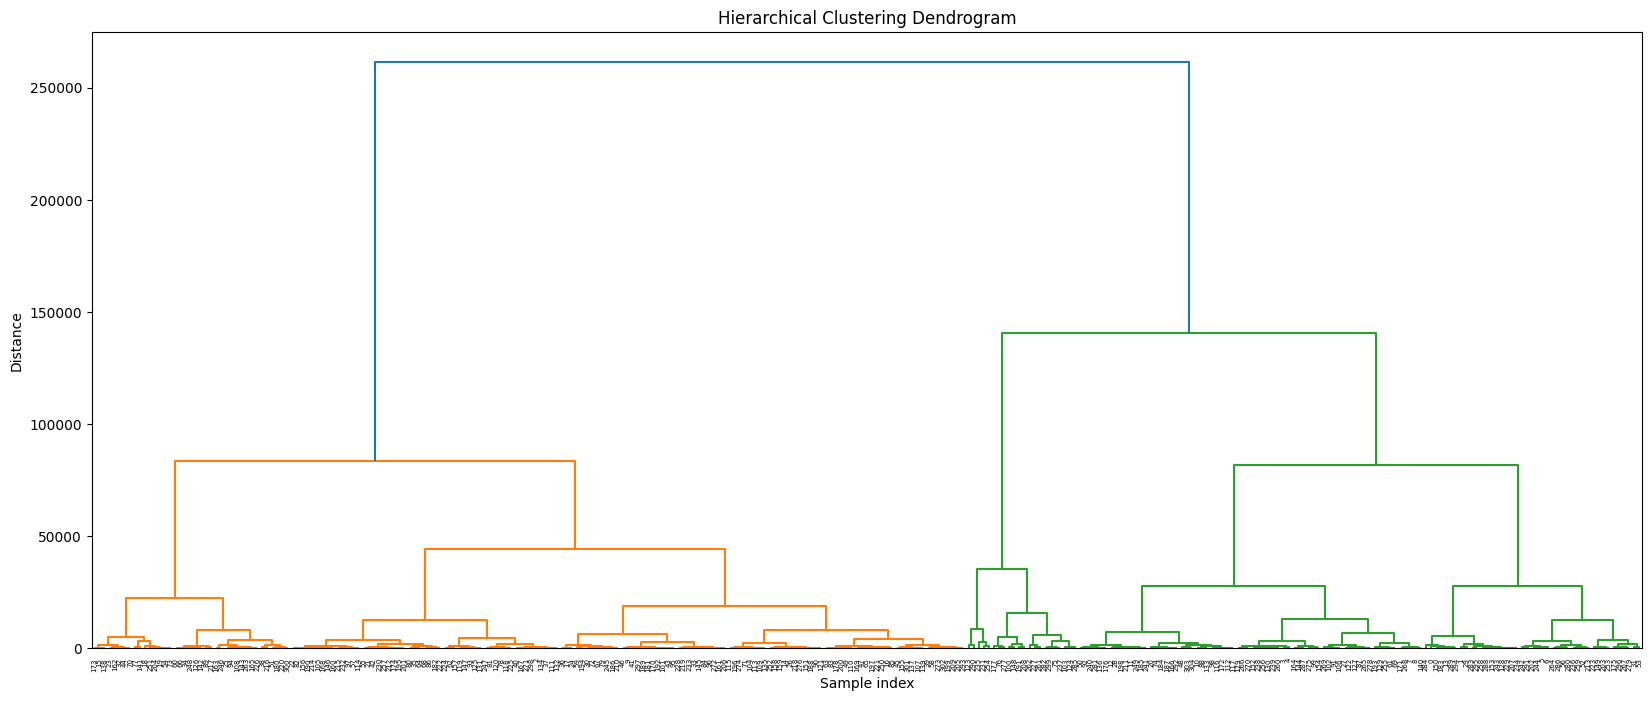

In [24]:
# generate the linkage matrix
Z = linkage(X, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

In [25]:
# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)
labels = clustering.labels_

Text(0, 0.5, 'Ventas')

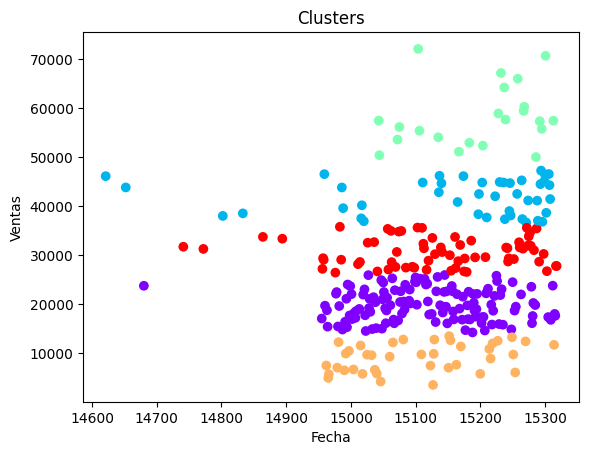

In [26]:
fig, ax = plt.subplots()

scatter = ax.scatter(X['Fecha_num'], X['Sales'], c=labels, cmap='rainbow')

ax.set_title('Clusters')
# poner nombre a los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')


In [27]:
# crear dataframe agrupado por StockCode haciendo agg de sum Quantity y Avg UnitPrice
df3 = df2.groupby(['StockCode']).agg({'Quantity': 'sum', 'UnitPrice': 'mean'})
df3

,Quantity,UnitPrice
StockCode,,
10002,823,0.850000
10080,291,0.411905
10120,193,0.210000
10123C,5,0.650000
10124A,16,0.420000
...,...,...
C2,133,49.378788
DOT,3,13.596667
M,2697,4.021477


In [28]:
X2 = df3[['Quantity', 'UnitPrice']]
X2

,Quantity,UnitPrice
StockCode,,
10002,823,0.850000
10080,291,0.411905
10120,193,0.210000
10123C,5,0.650000
10124A,16,0.420000
...,...,...
C2,133,49.378788
DOT,3,13.596667
M,2697,4.021477


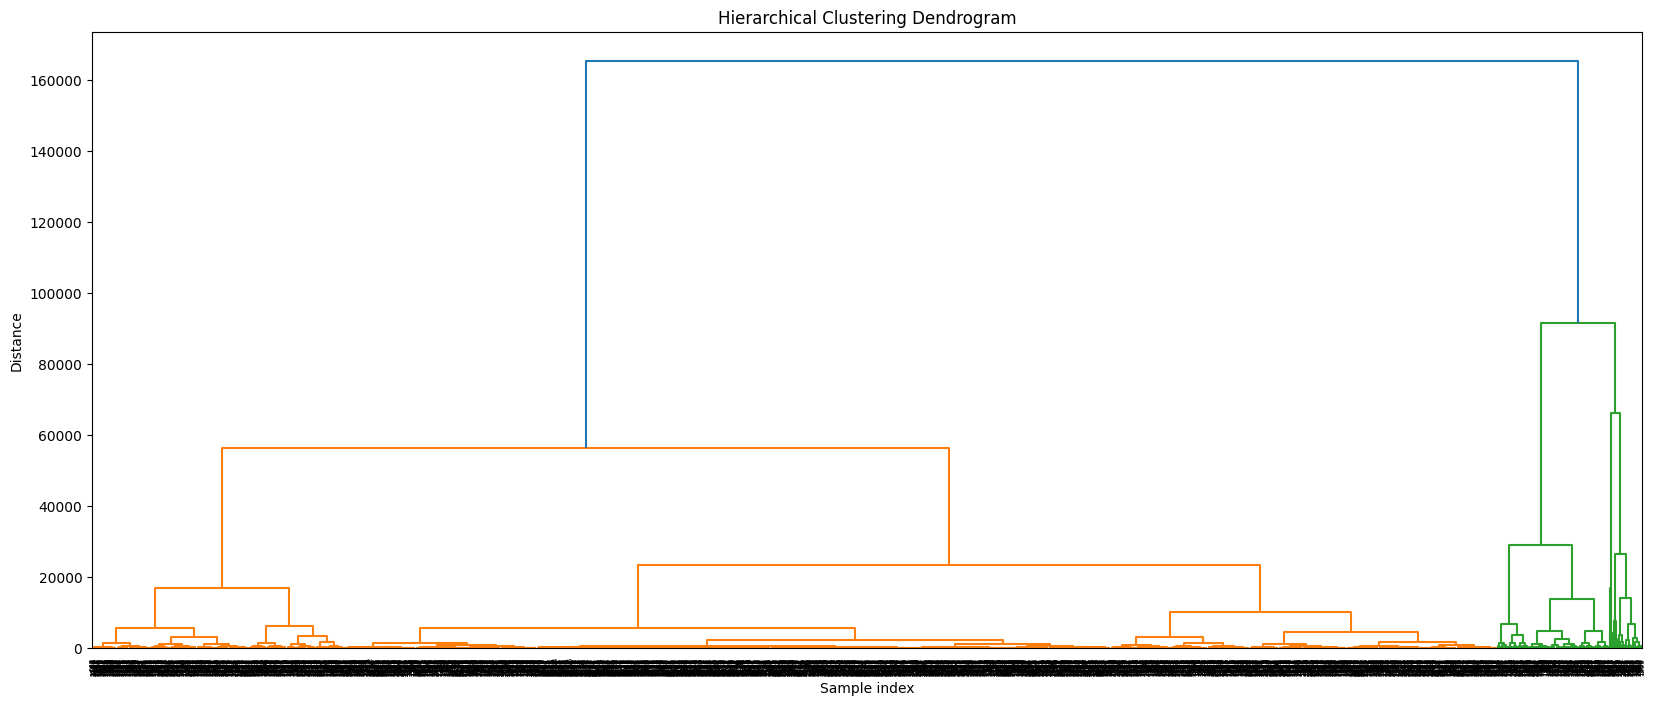

In [29]:
# generate the linkage matrix
Z = linkage(X2, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

In [30]:
# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X2)
labels = clustering.labels_

Text(0, 0.5, 'UnitPrice')

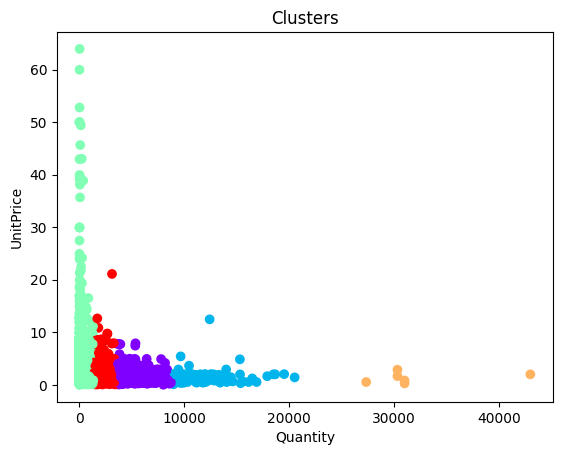

In [31]:
fig, ax = plt.subplots()

scatter = ax.scatter(X2['Quantity'], X2['UnitPrice'], c=labels, cmap='rainbow')

ax.set_title('Clusters')
# poner nombre a los ejes
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
